**Introduction to OpenCV**

**What is OpenCV?**

**OpenCV** is a library of programming functions mainly aimed at real-time computer vision. Originally developed by Intel, it was later supported by Willow Garage then Itseez. The library is cross-platform and free for use under the **open-source Apache 2 License**.

We will use Google Colab. Google Colab is similar to your laptop or desktop but cloud based and capable to use GPU,TPU etc. In brief, it is much better than to your laptop. On Google Colab you can use OpenCV just like your laptop. Only difference is "imshow" method. It is available in your personal laptop/desktop but not on Google Colab. Google Colab uses a separate patch and from that patch you need to import cv2_imshow to display any input image.

**How to read and display image using OpenCV?**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np

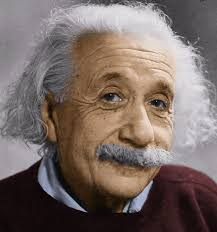

In [ ]:
img1 = cv2.imread("/content/sample_data/Einstein_2.jpg")
cv2_imshow(img1)

**How to Rotate an Image by 180 Degree?**

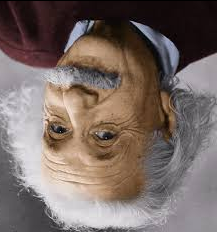

In [ ]:
rotated_img = imutils.rotate(img1,180)
cv2_imshow(rotated_img)

**How to Translate an Image by 100 pixel?**

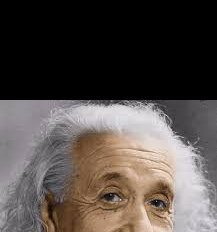

In [ ]:
translated_img = imutils.translate(img1,0,100)
cv2_imshow(translated_img)

**Finad Shape of a given Image and Convert it to Grey Scale Image**

In [ ]:
print(f"Original Shape of the Image {img1.shape}")
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
print(f"Gray Scale Image {img.shape}")

Original Shape of the Image (232, 217, 3)
Gray Scale Image (232, 217)


**Use Imutils and Resize the image**

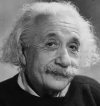

In [ ]:
resized_image = imutils.resize(img,width=100,height=100)
cv2_imshow(resized_image)

**Flip an Image Horizontally,Vertically,Horizontally and Vertically**

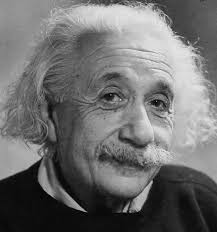

Fipped Horizontally


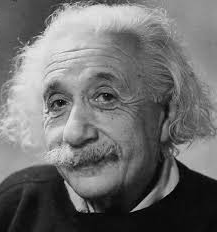

Flipped Vertically


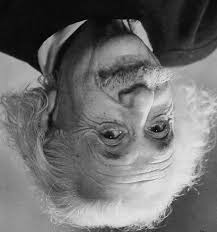

Flipped Horizontally and Vertically


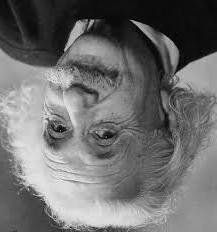

In [ ]:
flipped_horizontal_image = cv2.flip(img,1)
flipped_vertical_image = cv2.flip(img,0)
flipped_horizontal_vertical_image = cv2.flip(img,-1)
cv2_imshow(img)
print("Fipped Horizontally")
cv2_imshow(flipped_horizontal_image)
print("Flipped Vertically")
cv2_imshow(flipped_vertical_image)
print("Flipped Horizontally and Vertically")
cv2_imshow(flipped_horizontal_vertical_image)

**Crop an Image**

Cropping means take a portion of an image. Remember image is basically a numpy array. We need to select number of rows and columns from the array to crop an image.

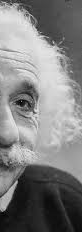

In [ ]:
cropped = img[0:232,135:217]
cv2_imshow(cropped)

**Addition and Subtraction of Brightness**

After Addition:High Brightness


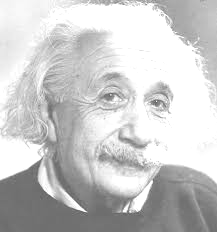

After Subtraction:Low Brightness


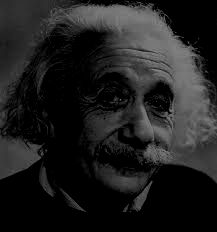

In [ ]:
M = np.ones(img.shape,dtype="uint8")*100
add_img = cv2.add(img,M)
print("After Addition:High Brightness")
cv2_imshow(add_img)
print("After Subtraction:Low Brightness")
sub_img = cv2.subtract(img,M)
cv2_imshow(sub_img)

**How to create an Image using Numpy?**

**Simple Rectangle and Circle**

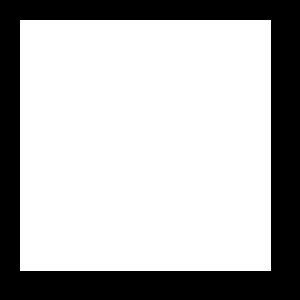

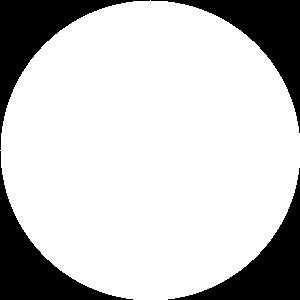

In [ ]:
rectangle = np.zeros((300,300),dtype="uint8")
cv2.rectangle(rectangle,(20,20),(270,270),255,-1)
cv2_imshow(rectangle)
circle = np.zeros((300,300),dtype="uint8")
cv2.circle(circle,(150,150),150,255,-1)
cv2_imshow(circle)

**What is bitwise_and operation?**

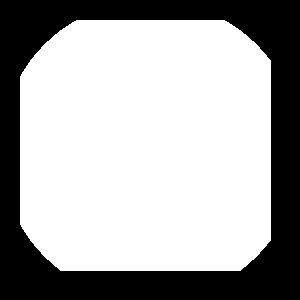

In [ ]:
bitwise_and = cv2.bitwise_and(rectangle,circle)
cv2_imshow(bitwise_and)

**Bitwise_OR Operator**

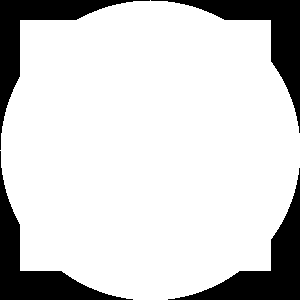

In [ ]:
bitwiseor = cv2.bitwise_or(rectangle,circle)
cv2_imshow(bitwiseor)

**Bitwise_XOR Operator**

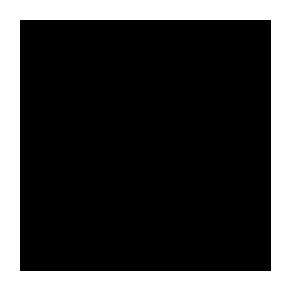

In [ ]:
bitwisenot = cv2.bitwise_not(rectangle,circle)
cv2_imshow(bitwisenot)

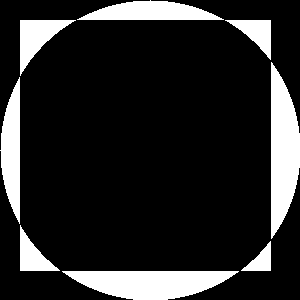

In [ ]:
bitwisexor = cv2.bitwise_xor(rectangle,circle)
cv2_imshow(bitwisexor)

**What is Mask?**

In simple word masking refers the selection of portion of an image by using bitwise_and operator.

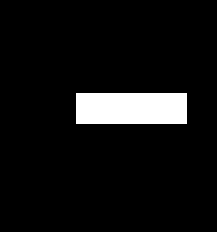

Size of Mask (232, 217)
Original Image


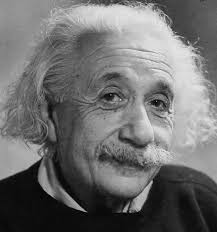

After Masking


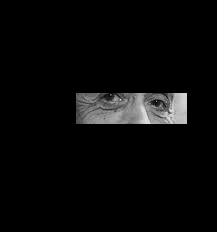

In [ ]:
masks = np.zeros_like(img)
(cx,cy) = (img.shape[0]//2,img.shape[1]//2)
cv2.rectangle(masks,(cx-40,cy-15),(cx+70,cy+15),255,-1)
cv2_imshow(masks)
print(f"Size of Mask {masks.shape}")
print("Original Image")
cv2_imshow(img)
img.shape
masked_img = cv2.bitwise_and(img,img,mask=masks)
print("After Masking")
cv2_imshow(masked_img)

**How to Calculate Histogram of an Image?**

Text(0, 0.5, 'Number of Pixels')

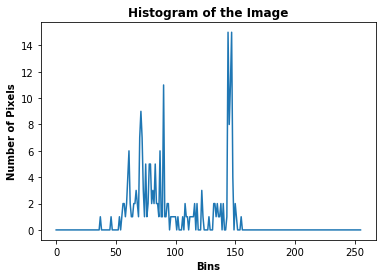

In [ ]:
import matplotlib.pyplot as plt

hist = cv2.calcHist(img,[0],None,[256],[0,256])
plt.plot(hist)
plt.title("Histogram of the Image",fontweight='bold')
plt.xlabel("Bins",fontweight="bold")
plt.ylabel("Number of Pixels",fontweight='bold')



**Histogram of Color Image**

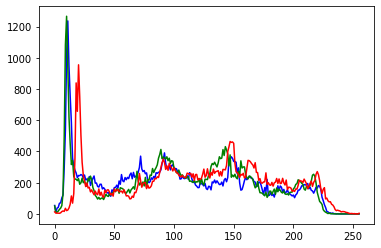

In [ ]:
chan = cv2.split(img1)
colors = ("b","g","r")
for (chan,colors) in zip(chan,colors):
  hist = cv2.calcHist([chan],[0],None,[256],[0,256])
  plt.plot(hist,color=colors)

**Use of Histogram to Create Better Clarity of an Image**

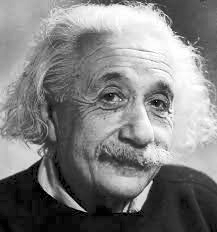

Text(0, 0.5, 'Number of Pixels')

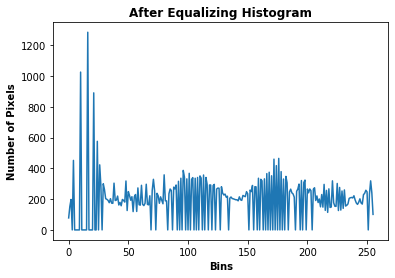

In [ ]:
equalize_img = cv2.equalizeHist(img)
cv2_imshow(equalize_img)
hist = cv2.calcHist([equalize_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title("After Equalizing Histogram",fontweight="bold")
plt.xlabel("Bins",fontweight="bold")
plt.ylabel("Number of Pixels",fontweight="bold")

**Use of Average, Median, Gaussian, and Bilateral Filter to Create Blur Image**

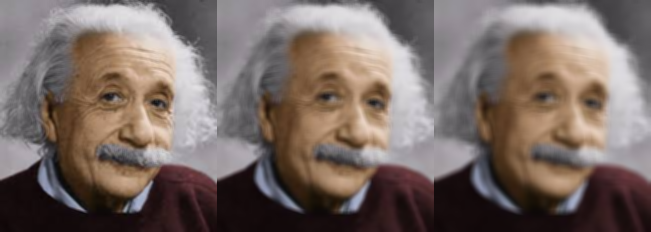

In [ ]:
blurred = np.hstack([
                     cv2.blur(img1,(3,3)),
                     cv2.blur(img1,(5,5)),
                     cv2.blur(img1,(7,7))])
cv2_imshow(blurred)

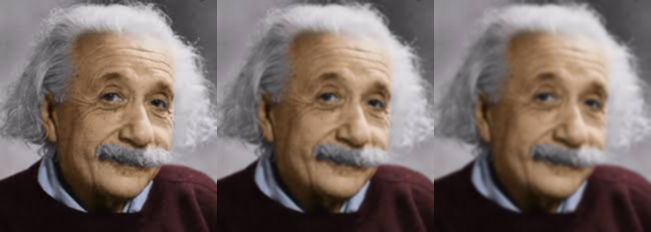

In [ ]:
blurred = np.hstack([
                     cv2.GaussianBlur(img1,(3,3),0),
                     cv2.GaussianBlur(img1,(5,5),0),
                     cv2.GaussianBlur(img1,(7,7),0)])
cv2_imshow(blurred)

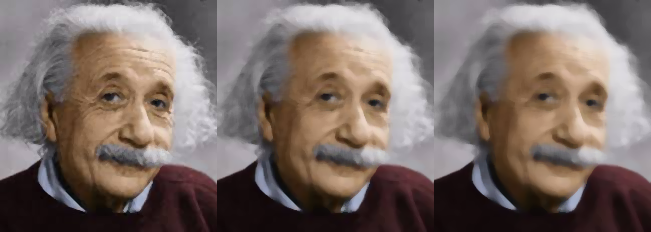

In [ ]:
blurred = np.hstack([
                     cv2.medianBlur(img1,3),
                     cv2.medianBlur(img1,5),
                     cv2.medianBlur(img1,7)])
cv2_imshow(blurred)

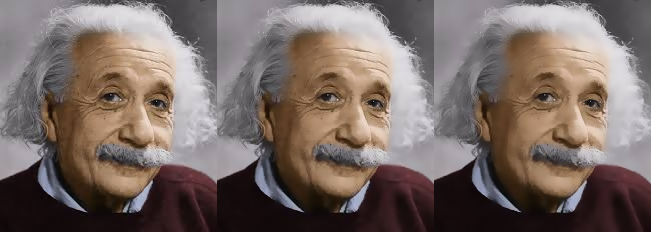

In [ ]:
blurred = np.hstack([cv2.bilateralFilter(img1,5,21,21),
                     cv2.bilateralFilter(img1,7,31,31),
                     cv2.bilateralFilter(img1,9,41,41)])
cv2_imshow(blurred)

**Use of Threshold in Image Processing**

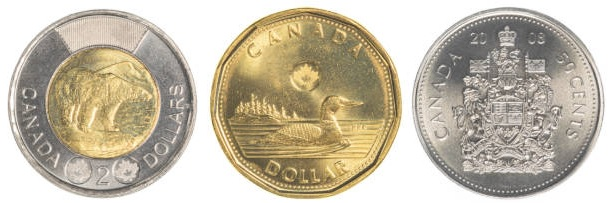

In [ ]:
coin = cv2.imread("/content/sample_data/Coins.jpg")
cv2_imshow(coin)

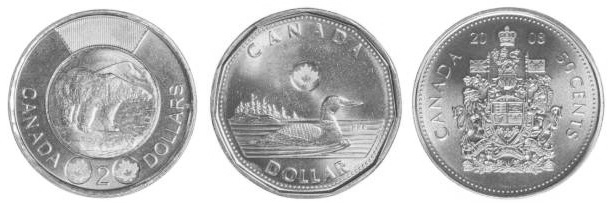

In [ ]:
coin_grey = cv2.cvtColor(coin,cv2.COLOR_BGR2GRAY)
cv2_imshow(coin_grey)

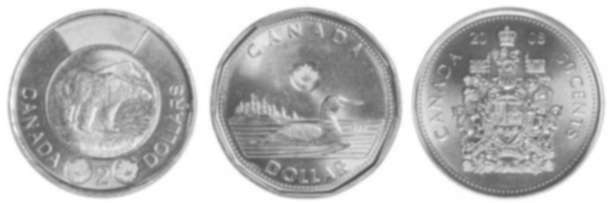

In [ ]:
blurred_coin = cv2.GaussianBlur(coin_grey,(5,5),0)
cv2_imshow(blurred_coin)

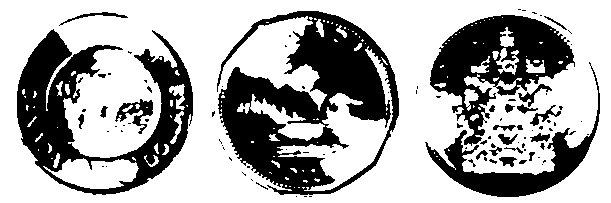

In [ ]:
(T,Thresh) = cv2.threshold(blurred_coin,155,255,cv2.THRESH_BINARY)
cv2_imshow(Thresh)

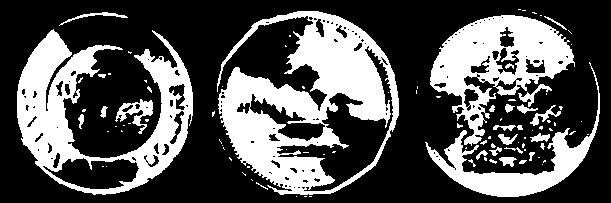

In [ ]:
(T,Threshinv) = cv2.threshold(blurred_coin,155,255,cv2.THRESH_BINARY_INV)
cv2_imshow(Threshinv)

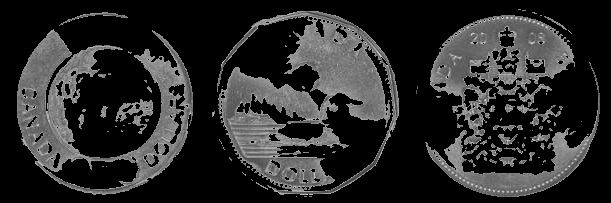

In [ ]:
masked_coin = cv2.bitwise_and(coin_grey,coin_grey,mask=Threshinv)
cv2_imshow(masked_coin)

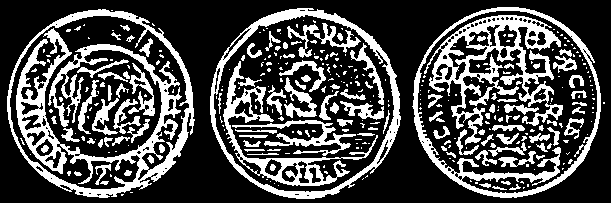

In [ ]:
adaptivethresh_coin = cv2.adaptiveThreshold(blurred_coin,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,4)
cv2_imshow(adaptivethresh_coin)

#cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

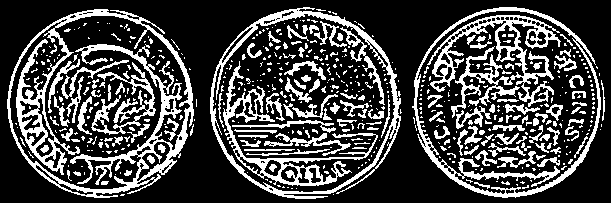

In [ ]:
adaptive_gaussian_coin = cv2.adaptiveThreshold(blurred_coin,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,3)
cv2_imshow(adaptive_gaussian_coin)

**Calculate Threshold Value Using OTSU Method**

In [ ]:
!pip install mahotas

In [ ]:
import mahotas

In [ ]:
T = mahotas.thresholding.otsu(blurred_coin)
print(f"Otsus's Threshold value is {T}")

Otsus's Threshold value is 194


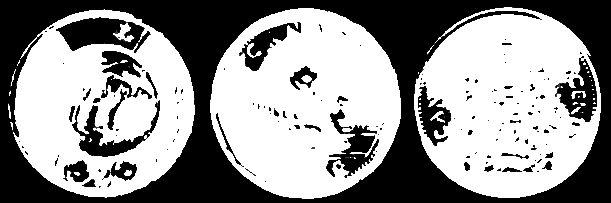

In [ ]:
Otsu_coin = blurred_coin.copy()
Otsu_coin[Otsu_coin > T]=255
Otsu_coin[Otsu_coin < T]=0
Otsu_coin_not = cv2.bitwise_not(Otsu_coin)
cv2_imshow(Otsu_coin_not)

**Riddler-Calvard Thresholding Method**

Riddler-Calvard Thresholding 193.86035300850327


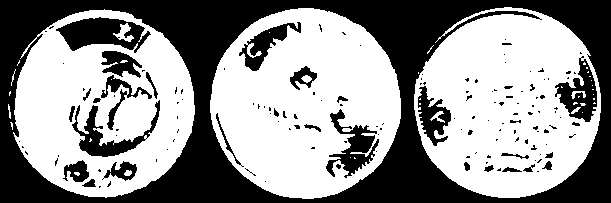

In [ ]:
Tr = mahotas.thresholding.rc(blurred_coin)
print(f"Riddler-Calvard Thresholding {Tr}")
Riddler_coin = blurred_coin.copy()
Riddler_coin[Riddler_coin > Tr] = 255
Riddler_coin[Riddler_coin < Tr] = 0
Riddler_coin_not = cv2.bitwise_not(Riddler_coin)
cv2_imshow(Riddler_coin_not)

**Edge Detection and Counting of Coins**

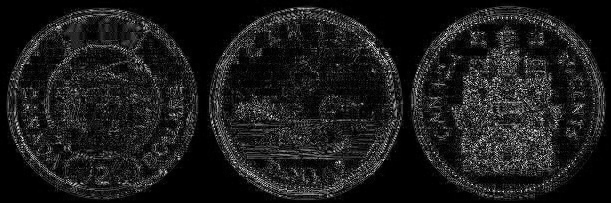

In [ ]:
lap_coin = cv2.Laplacian(coin_grey,cv2.CV_64F)
lap_coin = np.uint8(np.absolute(lap_coin))
cv2_imshow(lap_coin)

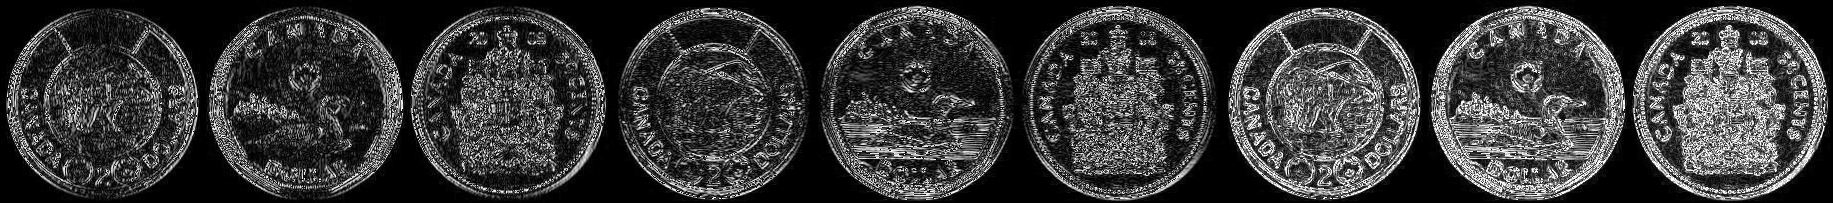

In [ ]:
sobelx_coin = cv2.Sobel(coin_grey,cv2.CV_64F,1,0)
sobely_coin = cv2.Sobel(coin_grey,cv2.CV_64F,0,1)
sobelx_coin = np.uint8(np.absolute(sobelx_coin))
sobely_coin = np.uint8(np.absolute(sobely_coin))
sobelcombined = cv2.bitwise_or(sobelx_coin,sobely_coin)
final = np.hstack([sobelx_coin,sobely_coin,sobelcombined])
cv2_imshow(final)

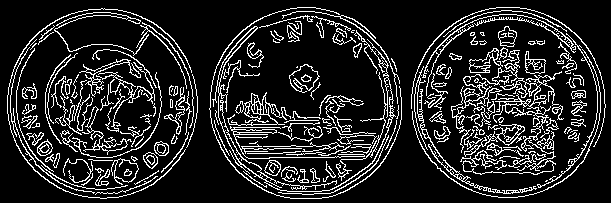

In [ ]:
canny_coin = cv2.Canny(blurred_coin,30,150)
cv2_imshow(canny_coin)

 Center is (102, 104) and radius is 95 
 Center is (306, 104) and radius is 96 
 Center is (508, 104) and radius is 90 
 Number of Coins 3


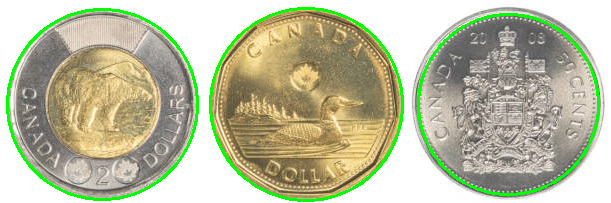

In [ ]:
#How many coins are in the image
rows = coin_grey.shape[0]
detected_circles = cv2.HoughCircles(blurred_coin,cv2.HOUGH_GRADIENT,1,rows/8,param1=30,param2=150,minRadius=1,maxRadius=500)
#detected_circles
counter = 0
if detected_circles is not None:
   #print("Hello")
   detected_circles = np.uint16(np.around(detected_circles))
   for pt in detected_circles[0,:]:
       a,b,r = pt[0],pt[1],pt[2]
       print(f" Center is {a,b} and radius is {r} ")
       counter +=1
       cv2.circle(coin,(a,b),r,(0,255,0),2)
print(f" Number of Coins {counter}")
cv2_imshow(coin)      
